In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import transform

(1280, 960, 3)


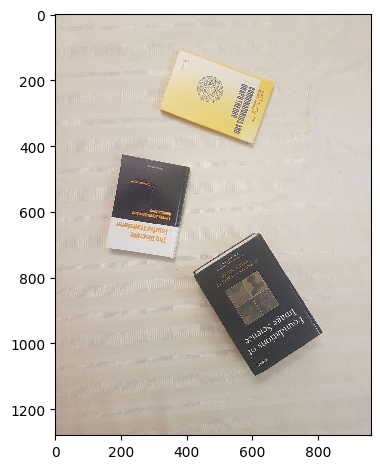

In [2]:
img = imread('books.jpg')
imshow(img);
print(img.shape)

In [38]:
src1 = [(103, 381),(288, 310),(393, 603),(203, 668)]
dst1 = [(790, 0),(790, 500),(0, 500),(0, 0)]

src2 = [(461, 412), (424, 203), (710, 147),(744, 361)]
dst2 = [(740, 0), (740, 500), (0, 500), (0, 0)]

src3 = [(658, 617), (786, 407), (1105, 607), (968, 817)]
dst3 = [(770, 0), (770, 500), (0, 500), (0, 0)]

In [39]:
s1 = np.float32(src1).reshape(-1,1,2)
d1 = np.float32(dst1).reshape(-1,1,2)

s2 = np.float32(src2).reshape(-1,1,2)
d2 = np.float32(dst2).reshape(-1,1,2)

s3 = np.float32(src3).reshape(-1,1,2)
d3 = np.float32(dst3).reshape(-1,1,2)

In [40]:
M1, mask1 = cv2.findHomography(s1,d1,cv2.RANSAC,5)
M2, mask2 = cv2.findHomography(s2,d2,cv2.RANSAC,5)
M3, mask3 = cv2.findHomography(s3,d3,cv2.RANSAC,5)

In [41]:
def projectiveT(u, v, H):
  a  = H@np.array([u,v,1])
  return int(round(a[0]/a[2])),int(round(a[1]/a[2]))

In [16]:
def backwardMap(img, M, umax, vmax):
  H = np.linalg.inv(M)
  wrapped_img = np.zeros((umax+1,vmax+1,3)).astype(np.uint8)
  for u in range(umax+1):
    for v in range(vmax+1):
      x, y = projectiveT(u, v, H)
      wrapped_img[u,v] = img[x,y]

  return wrapped_img


In [42]:
w_img1 = backwardMap(img, M1, 790, 500)
w_img2 = backwardMap(img, M2, 740, 500)
w_img3 = backwardMap(img, M3, 770, 500)

True

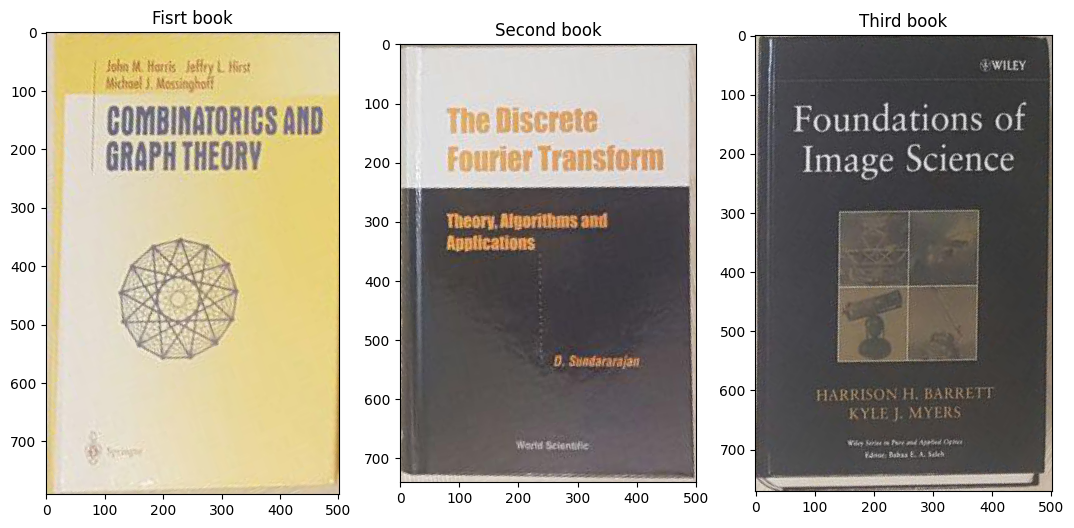

In [43]:
fig, ax = plt.subplots(1,3, figsize=(13,6))
ax[0].imshow(w_img1);
ax[0].set_title('Fisrt book')
ax[1].imshow(w_img2);
ax[1].set_title('Second book')
ax[2].imshow(w_img3);
ax[2].set_title('Third book')
cv2.imwrite("res01.jpg", w_img1)
cv2.imwrite("res02.jpg", w_img2)
cv2.imwrite("res03.jpg", w_img3)

In [44]:
cv2.imwrite("res01.jpg", w_img1)
cv2.imwrite("res02.jpg", w_img2)
cv2.imwrite("res03.jpg", w_img3)

True